In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    plt.style.use('dark_background')
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def img_processing(img):
    # do something here

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 先將圖片轉為灰階
    
    # global thresholding
    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # plot all the images and their histograms
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Original Noisy Image','Original Noisy Image','Gaussian filtered Image',
              'Histogram','Histogram',"Histogram", 
              'Global Thresholding (v=127)', "Otsu's Thresholding", "Otsu's Thresholding",
             'Histogram','Histogram',"Histogram"]
    
    plt.figure(figsize=(15,15)) 
    for i in range(3):        
        plt.subplot(4,3,0*3+i+1)
        plt.imshow(images[i*3],'gray')
        plt.title(titles[0*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,1*3+i+1)
#         plt.hist(images[i*3].ravel(),256)
        plt.hist(images[i*3].ravel(), 256, [0, 300])
        plt.title(titles[1*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,2*3+i+1)
        plt.imshow(images[i*3+2],'gray')
        plt.title(titles[2*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,3*3+i+1)
#         plt.hist(images[i*3+2].ravel(),256)
        plt.hist(images[i*3+2].ravel(), 256, [0, 300])
        plt.title(titles[3*3+i]) #, plt.xticks([]), plt.yticks([])
        
    plt.show()


origin picture:


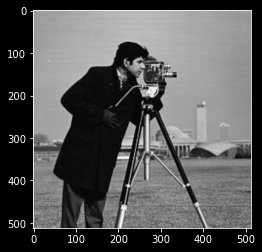

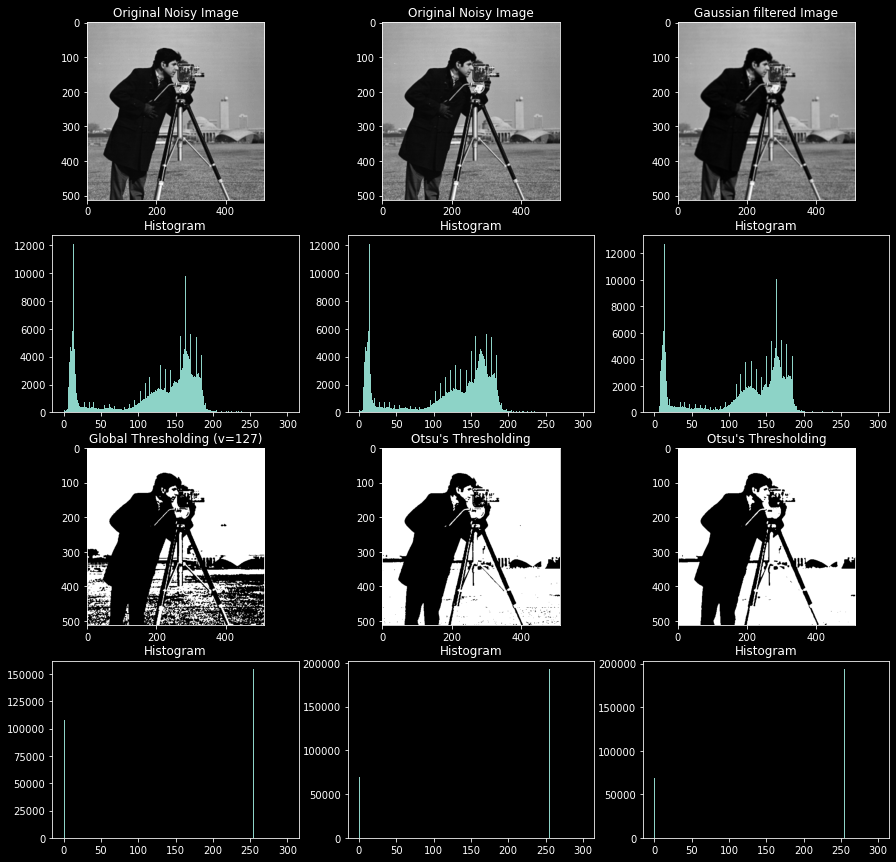

In [4]:
file_name = "./testdata/camera.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

img_processing(origin_img)


# Reference

https://zh.wikipedia.org/wiki/%E5%A4%A7%E6%B4%A5%E7%AE%97%E6%B3%95

http://scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html

https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

http://gwang-cv.github.io/2017/08/25/python+opencv%E5%9B%BE%E5%83%8F%E4%BA%8C%E5%80%BC%E5%8C%96/

https://scikit-image.org/docs/0.13.x/auto_examples/xx_applications/plot_thresholding.html
